In [7]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt

@njit
def Julia(z, c, max_steps):
    for itr in range(max_steps):
        if abs(z) > 2:
            return itr
        z = z**2 + c  # The Julia set formula
    return max_steps

@njit
def JuliaSet(ext, Nxy, c, max_steps):
    data = np.zeros((Nxy, Nxy))
    for i in range(Nxy):
        for j in range(Nxy):
            x = ext[0] + (ext[1] - ext[0]) * i / (Nxy - 1.)
            y = ext[2] + (ext[3] - ext[2]) * j / (Nxy - 1.)
            z = x + y * 1j
            data[i, j] = Julia(z, c, max_steps)
    return data

In [8]:
# Define parameters
extent = [-2, 2, -2, 2]  # Plot range
N = 1000                 # Resolution
c = -0.7 + 0.27015j      # Complex constant for Julia set
max_iter = 300           # Max iterations

In [9]:
data = JuliaSet(extent, N, c, max_iter)

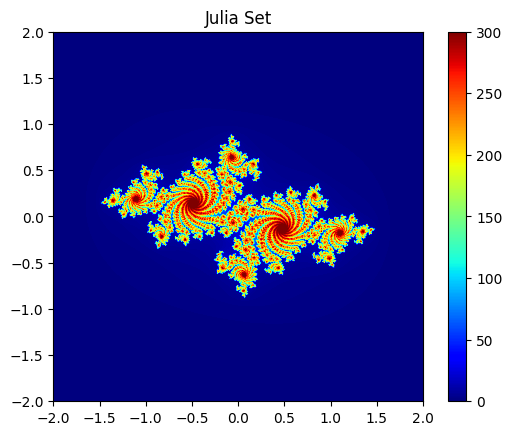

In [10]:
plt.imshow(data.T, extent=extent, cmap=plt.cm.jet, origin='lower')
plt.colorbar()
plt.title("Julia Set")
plt.show()